In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
beer_data_filename = 'beer_data.csv'

# Load CSV Beer list

In [3]:
beer_pd = pd.read_csv(beer_data_filename)
beer_fil_pd = beer_pd.dropna(subset=['Beer'])
len(beer_fil_pd)

129

# Visualisation

## Alcohol by Volume (ABV) and International Bitterness Unit (IBU)

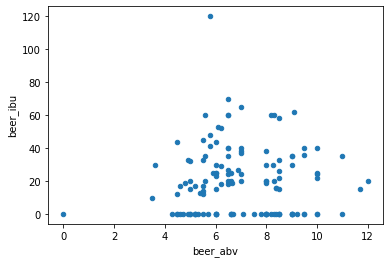

In [4]:
beer_fil_pd.plot.scatter(x='beer_abv', y='beer_ibu')

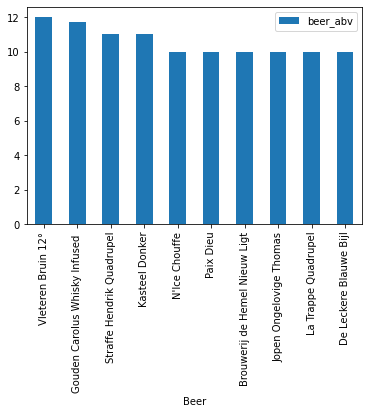

In [5]:
beer_abv = beer_fil_pd.sort_values('beer_abv', ascending=False).head(10)
beer_abv.plot.bar(x='Beer', y='beer_abv')

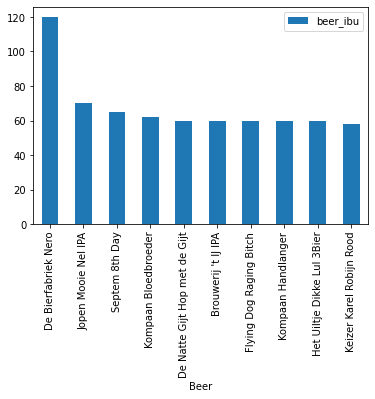

In [6]:
beer_ibu = beer_fil_pd.sort_values('beer_ibu', ascending=False).head(10)
beer_ibu.plot.bar(x='Beer', y='beer_ibu')

## Brewery

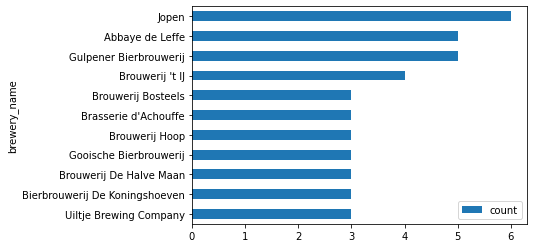

In [18]:
brewery_pd = beer_fil_pd.groupby(['brewery_name'])['brewery_name'].count()\
    .rename().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=True)
brewery_pd[brewery_pd['count'] > 2].plot.barh(x='brewery_name', y='count')

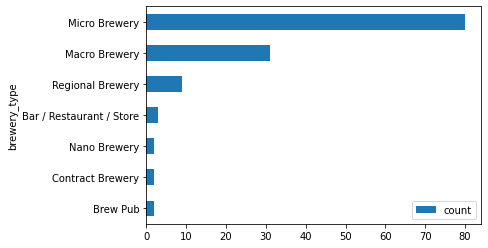

In [42]:
brewery_type_pd = beer_fil_pd.groupby(['brewery_type'])['brewery_type'].count()\
    .rename().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=True)
brewery_type_pd['percentage'] = (brewery_type_pd['count'] / brewery_type_pd['count'].sum())*100
brewery_type_pd.plot.barh(x='brewery_type', y='count')

In [44]:
brewery_type_pd

,brewery_type,count,percentage
1,Brew Pub,2,1.550388
2,Contract Brewery,2,1.550388
5,Nano Brewery,2,1.550388
0,Bar / Restaurant / Store,3,2.325581
6,Regional Brewery,9,6.976744
3,Macro Brewery,31,24.031008
4,Micro Brewery,80,62.015504


## Beer style

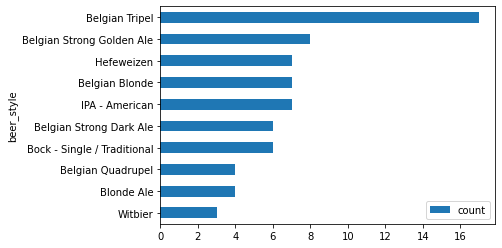

In [26]:
beer_style = beer_fil_pd.groupby('beer_style')['Beer'].count().reset_index().rename(columns={'Beer': 'count'})
beer_style_top = beer_style.dropna(subset=['beer_style']).sort_values('count', ascending=True).tail(10)
beer_style_top.plot.barh(x='beer_style', y='count')

## Seasonal trends

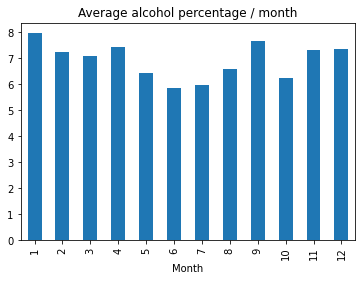

In [9]:
beer_month_pd = beer_fil_pd.groupby(['Month'])['beer_abv'].mean().reset_index()
beer_month_pd.plot.bar(x='Month', y='beer_abv', title='Average alcohol percentage / month', legend=False)

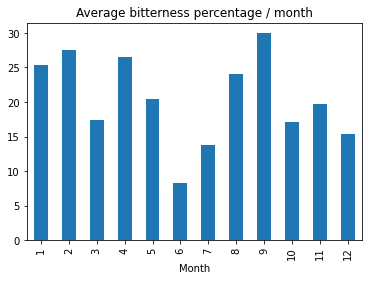

In [13]:
beer_month_pd = beer_fil_pd.groupby(['Month'])['beer_ibu'].mean().reset_index()
beer_month_pd.plot.bar(x='Month', y='beer_ibu', title='Average bitterness percentage / month', legend=False)

## Locations (depricated)
https://matplotlib.org/basemap/api/basemap_api.html

In [10]:
!conda install -q basemap -y

/bin/sh: conda: command not found


In [11]:
!conda install -c conda-forge basemap-data-hires -y

/bin/sh: conda: command not found


In [12]:
# Basemap fix
import conda
import os

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

ModuleNotFoundError: No module named 'conda'

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
beer_loc = beer_fil_pd.dropna(subset=['lng'])
beer_loc = beer_loc[beer_loc['lng'] != 0]
len(beer_loc)

In [ ]:
plt.figure(figsize=(15,10))
    
map = Basemap(
    projection='merc', 
    lat_0 = 57, 
    lon_0 = -135,
    resolution = 'h', 
    area_thresh = 0.1,
    llcrnrlat=50, 
    urcrnrlat=54.0,
    llcrnrlon=2.0, 
    urcrnrlon=10.5, 
    lat_ts=51.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'honeydew')
map.drawmapboundary()

for _, row in beer_loc.iterrows():
    x,y = map(row['lng'], row['lat'])
    map.plot(x, y, 'ro', markersize=5)
 
plt.show()

In [ ]:
lat_min = beer_loc['lat'].min()-2
lat_max = beer_loc['lat'].max()+2
lon_min = beer_loc['lng'].min()-2
lon_max = beer_loc['lng'].max()+2

plt.figure(figsize=(12,25))
    
map = Basemap(
    projection='merc', 
    lat_0 = 57, 
    lon_0 = -135,
    resolution = 'h', 
    area_thresh = 0.1,
    llcrnrlat=lat_min, 
    urcrnrlat=lat_max,
    llcrnrlon=lon_min, 
    urcrnrlon=lon_max
)

map.shadedrelief()

for _, row in beer_loc.iterrows():
    x,y = map(row['lng'], row['lat'])
    map.plot(x, y, 'ro', markersize=5)
 
plt.show()